'''
Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных и месячных группах для Brent.

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.'''

## Задание 1
а - временной ряд
б-е) если каждой отметке времени будет сопоставлена скорость, то это временной ряд. Если просто одно число - средняя скорость - то нет.

In [79]:
!dir

 ’®¬ ў гбва®©бвўҐ C Ё¬ҐҐв ¬ҐвЄг Windows
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 5E95-633B

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\egoro\Anaconda\MLforBuisness

01.11.2020  20:14    <DIR>          .
01.11.2020  20:14    <DIR>          ..
01.11.2020  17:55    <DIR>          .ipynb_checkpoints
01.11.2020  20:00            44я079 brent.xlsx
01.11.2020  17:51         3я206я580 DOM_hourly.csv
01.11.2020  17:51         3я214я852 DUQ_hourly.csv
01.11.2020  20:13           468я959 Less1HW.ipynb
01.11.2020  17:51         4я070я265 PJME_hourly.csv
               5 д ©«®ў     11я004я735 Ў ©в
               3 Ї Ї®Є  868я865я884я160 Ў ©в бў®Ў®¤­®


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

## Задание 2 - DUQ

In [13]:
data = pd.read_csv("DUQ_hourly.csv", index_col=[0], parse_dates=[0])

In [14]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [15]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [16]:
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

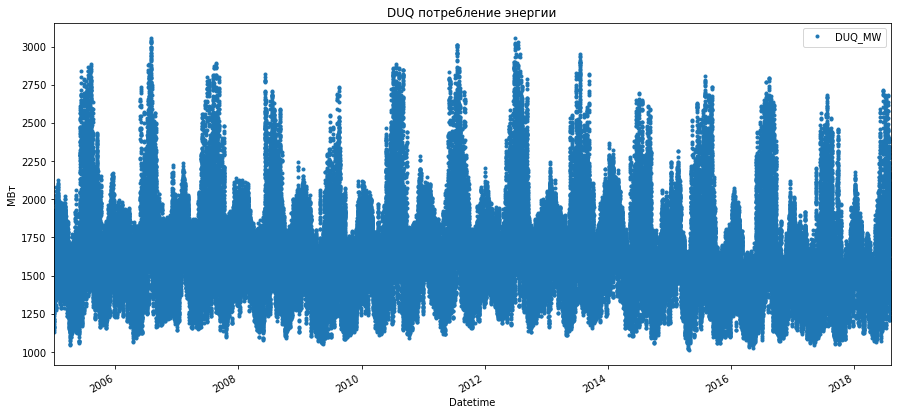

In [17]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

In [18]:
data['date'] = data.index
data_2012 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2012 , data['date'].dt.month == 10), data['date'].dt.day > 20  )]

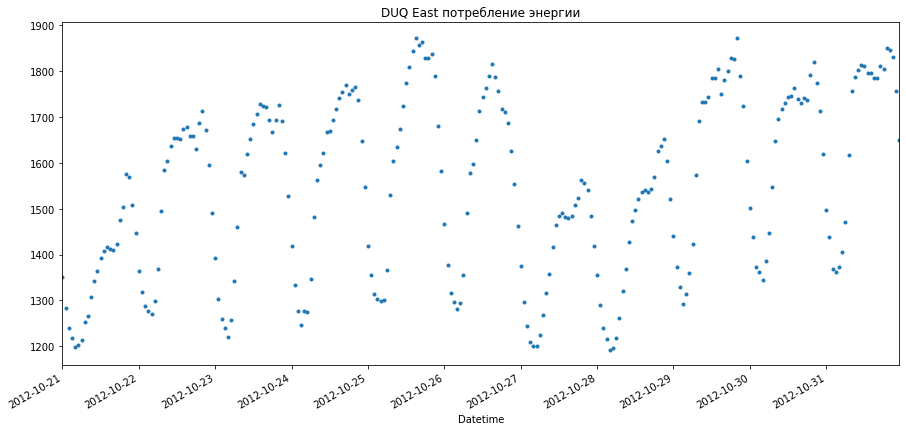

In [20]:
_ = data_2012['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ East потребление энергии' )

In [21]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


In [22]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [23]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

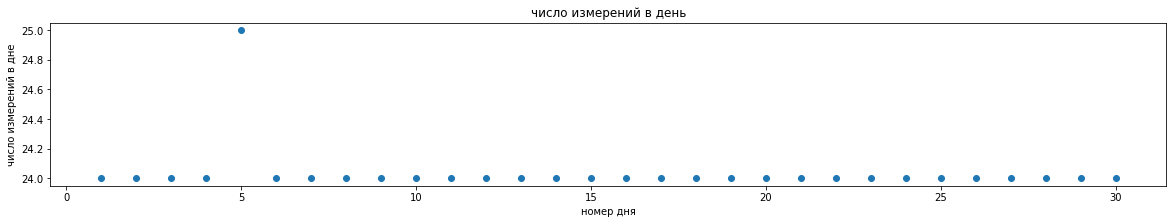

In [29]:
day_H=data['2017-11-01 00:00:00':'2017-11-30 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

In [30]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

5    25
Name: Datetime, dtype: int64

In [35]:
datetimean = data['2017-11-01 00:00:00':'2017-11-30 23:00:00']

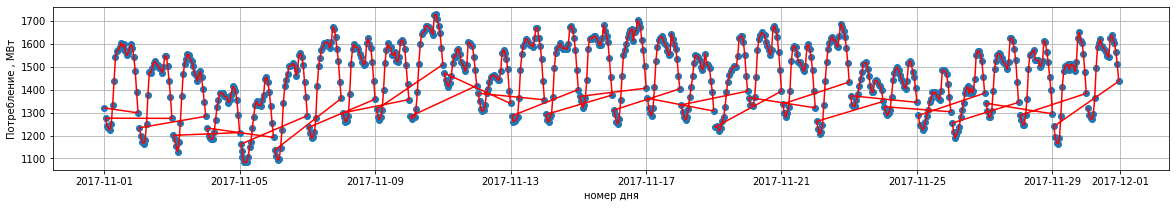

In [41]:
plt.figure(figsize=(20,3))
plt.plot(datetimean.index,datetimean['DUQ_MW'].values, 'o')
plt.plot(datetimean.index,datetimean['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2017-11-01 00:00:00','2017-11-30 23:00:00']))
#plt.plot(line_,np.array([28000,33000]),'g')
plt.grid('on')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')

plt.show()

In [42]:
data['2017-11-01 00:00:00':'2017-11-30 23:00:00'].head(30)

,DUQ_MW,date
Datetime,,
2017-11-30 01:00:00,1319.0,2017-11-30 01:00:00
2017-11-30 02:00:00,1290.0,2017-11-30 02:00:00
2017-11-30 03:00:00,1275.0,2017-11-30 03:00:00
2017-11-30 04:00:00,1271.0,2017-11-30 04:00:00
2017-11-30 05:00:00,1294.0,2017-11-30 05:00:00
2017-11-30 06:00:00,1364.0,2017-11-30 06:00:00
2017-11-30 07:00:00,1496.0,2017-11-30 07:00:00
2017-11-30 08:00:00,1587.0,2017-11-30 08:00:00
2017-11-30 09:00:00,1605.0,2017-11-30 09:00:00


## Выводы
В данных почти всё хорошо, кроме
1) Они расположены в обратном порядке, от текущей даты к предыдущим. 
2) Есть 4 точки с повторением измерения.

## Задание 3, брент

In [51]:
brent_data = pd.read_excel('brent.xlsx', index_col=[0], parse_dates=[0])
brent_data.head(10)

,Значение
Дата,
2020-10-30,37.45
2020-10-29,37.65
2020-10-28,39.12
2020-10-27,41.20
2020-10-26,40.46
2020-10-23,41.77
2020-10-22,42.46
2020-10-21,41.73
2020-10-20,43.16


In [52]:
brent_data.shape

(2735, 1)

In [53]:
brent_data.index

DatetimeIndex(['2020-10-30', '2020-10-29', '2020-10-28', '2020-10-27',
               '2020-10-26', '2020-10-23', '2020-10-22', '2020-10-21',
               '2020-10-20', '2020-10-19',
               ...
               '2010-11-12', '2010-11-11', '2010-11-10', '2010-11-09',
               '2010-11-08', '2010-11-05', '2010-11-04', '2010-11-03',
               '2010-11-02', '2010-11-01'],
              dtype='datetime64[ns]', name='Дата', length=2735, freq=None)

Text(0, 0.5, '$')

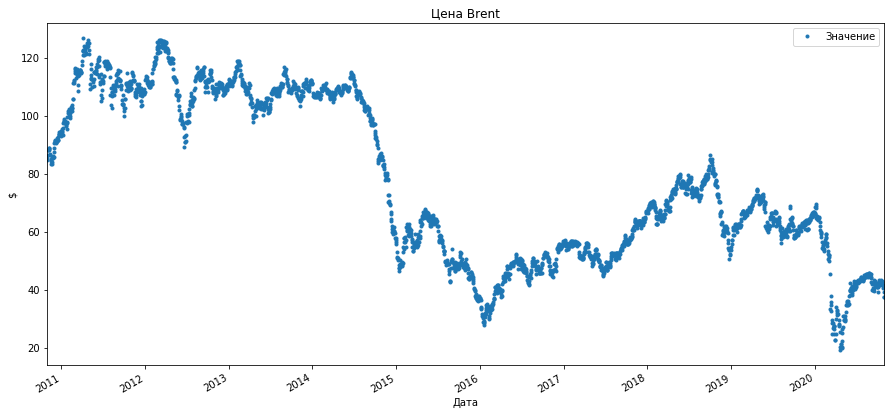

In [58]:
brent_data.plot( style = '.', figsize = ( 15, 7 ), title = 'Цена Brent' )
plt.ylabel ( '$' )

In [62]:
bdmm = brent_data.resample("M").mean()

In [74]:
bdmw = brent_data.resample("W").mean()

In [73]:
bdmy = brent_data.resample("Y").mean()

Text(0, 0.5, '$')

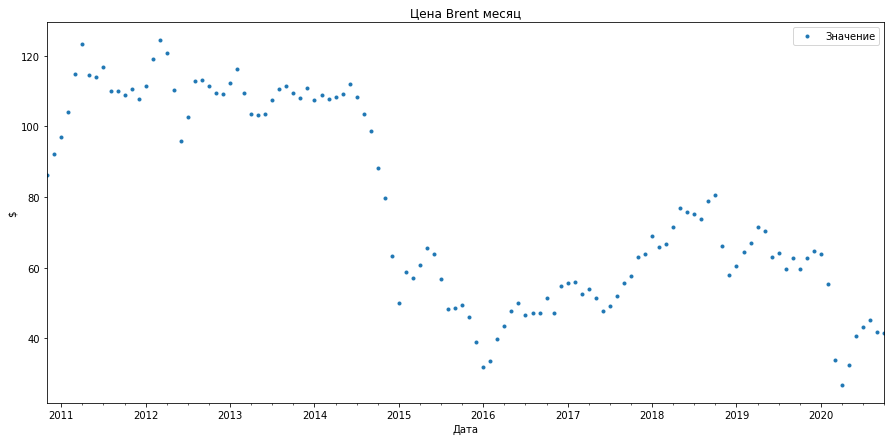

In [71]:
bdmm.plot( style = '.', figsize = ( 15, 7 ), title = 'Цена Brent месяц' )
plt.ylabel ( '$' )

Text(0, 0.5, '$')

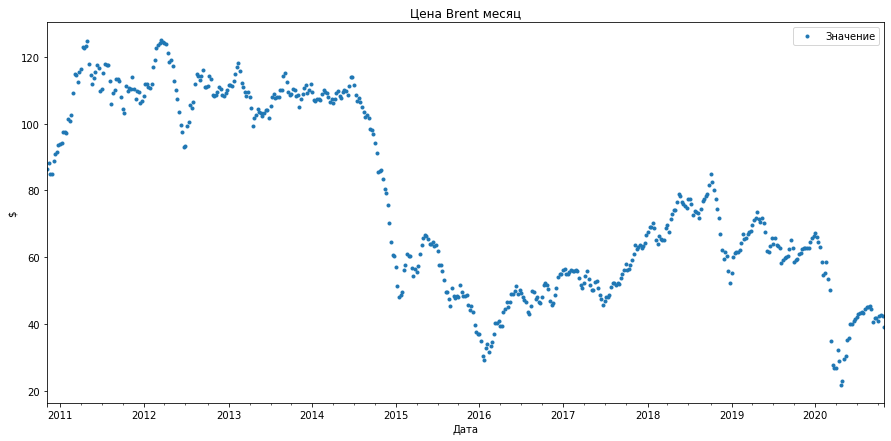

In [65]:
bdmw.plot( style = '.', figsize = ( 15, 7 ), title = 'Цена Brent неделя' )
plt.ylabel ( '$' )

Text(0, 0.5, '$')

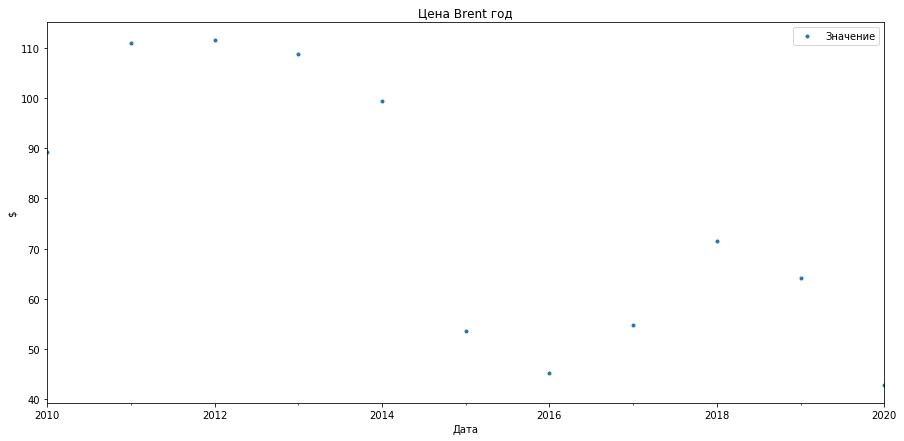

In [75]:
bdmy.plot( style = '.', figsize = ( 15, 7 ), title = 'Цена Brent год' )
plt.ylabel ( '$' )

In [67]:
bdsm = brent_data.resample("M").std()

In [66]:
bdsw = brent_data.resample("W").std()

In [76]:
bdsy = brent_data.resample("Y").std()

Text(0, 0.5, '$')

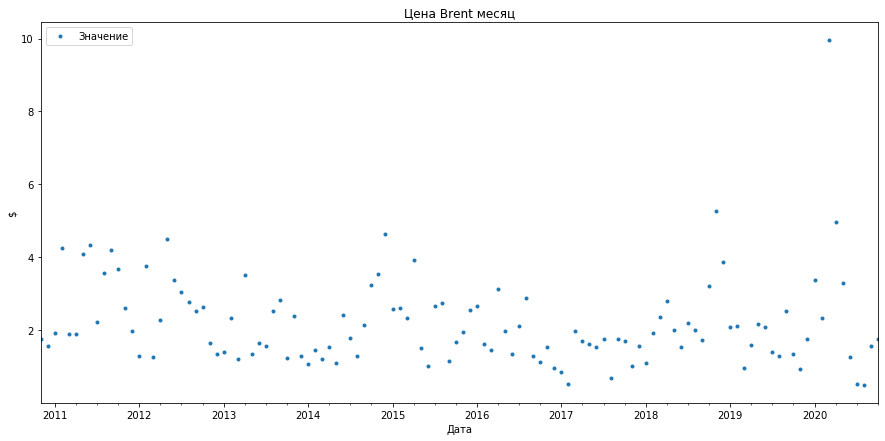

In [68]:
bdsm.plot( style = '.', figsize = ( 15, 7 ), title = 'Цена Brent месяц' )
plt.ylabel ( '$' )

Text(0, 0.5, '$')

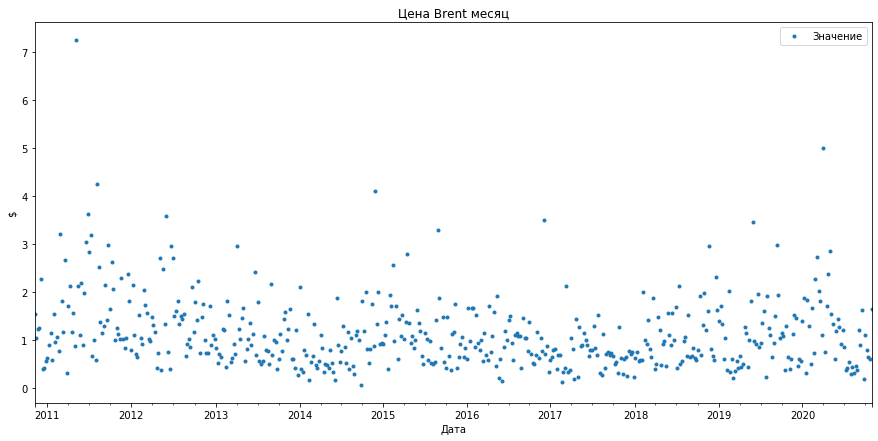

In [69]:
bdsw.plot( style = '.', figsize = ( 15, 7 ), title = 'Цена Brent неделя' )
plt.ylabel ( '$' )

Text(0, 0.5, '$')

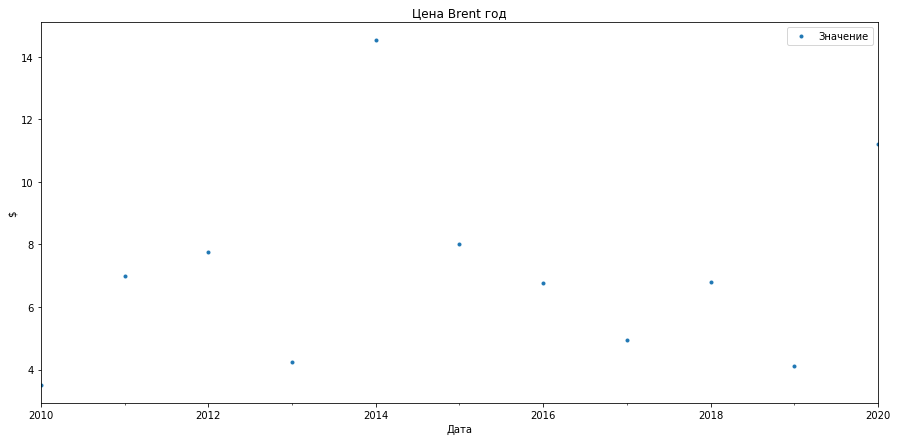

In [78]:
bdsy.plot( style = '.', figsize = ( 15, 7 ), title = 'Цена Brent год' )
plt.ylabel ( '$' )

## Выводы

Сложно сказать, как меняетсю графики среднего, кроме очевидного, становятся более гладкими.

А графики стандартного отклонения начинают больше скакать в абсолютных значениях, так как обычно тренды на падение носят более, чем недельный характер и даже более, чем месячный.